**Preprocessing data**

Import libraries

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import resample

Load data

In [ ]:
df1 = pd.DataFrame(arff.loadarff('/content/1year.arff')[0])
df1

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,0.249760,0.659800,0.166600,0.249760,497.42,0.733780,2.6349,0.249760,0.149420,43.3700,1.24790,0.214020,0.119980,0.477060,0.504940,0.604110,1.45820,1.761500,5.9443,0.117880,0.149420,94.140,3.8772,0.563930,0.214020,1.74100,593.27000,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.009700,1.52250,49.3940,0.185300,0.110850,2.04200,0.37854,0.257920,2.24370,2.24800,348690.0,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,0.261140,0.516800,0.158350,0.258340,677.96,0.538380,2.0005,0.258340,0.152000,87.9810,1.42930,0.248060,0.123040,NaN,0.395420,0.439920,88.44400,16.946000,3.6884,0.269690,0.152000,122.170,2.9876,2.987600,0.206160,1.69960,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.510450,1.12520,100.1300,0.237270,0.139610,1.94470,0.49988,0.334720,17.86600,17.86600,2304.6,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,0.312580,0.641840,0.244350,0.309060,794.16,0.459610,1.4369,0.309060,0.236100,73.1330,1.42830,0.302600,0.189960,NaN,0.289320,0.372820,86.01100,1.062700,4.3749,0.419290,0.238150,176.930,2.0630,1.427400,0.315650,1.30900,2.30190,0.51537,0.241140,0.322020,0.074020,0.231170,165.510,92.3810,0.948070,1.01010,96.3720,0.291810,0.222930,1.07580,0.48152,0.484740,1.20980,2.05040,6332.7,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,0.092704,0.301630,0.094257,0.092704,917.01,0.398030,3.2537,0.092704,0.071428,79.7880,1.50690,0.115500,0.062782,0.171930,0.573530,0.361520,0.94076,1.961800,4.6511,0.143430,0.071428,91.370,3.9948,0.375810,0.115500,1.35620,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.770,100.9800,0.287200,1.56960,84.3440,0.085874,0.066165,2.49280,0.30734,0.250330,2.45240,2.45240,20545.0,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,0.187320,0.331470,0.121820,0.187320,1133.20,0.322110,1.6307,0.187320,0.115530,57.0450,NaN,0.198320,0.115530,0.187320,0.386770,0.322110,1.41380,1.118400,4.1424,0.278840,0.115530,147.040,2.4823,0.323400,0.198320,1.62780,11.24700,0.43489,0.122310,0.293040,0.096680,0.122310,141.620,84.5740,0.739190,0.95787,65.9360,0.188110,0.116010,1.29590,0.56511,0.402850,1.88390,2.11840,3186.6,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,0.018371,0.052828,0.020881,0.018371,2041.50,0.178790,2.1093,0.018371,0.004526,4.9656,1.20480,0.032032,0.004526,0.018371,0.460840,0.178790,NaN,-0.172730,4.3025,0.093539,0.004526,31.645,11.5340,0.067565,0.032032,4.06500,1.23760,0.58717,0.007891,0.302270,0.158360,0.007891,9.572,4.6064,0.332650,0.44959,5.0255,-0.034360,-0.008464,0.44627,0.34776,0.086699,0.58450,0.74474,-2732.8,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,b'1'
7023,-0.013359,0.58354,-0.02265,0

In [ ]:
df2 = pd.DataFrame(arff.loadarff('/content/2year.arff')[0])
df2

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.51710,-14.54700,0.510690,0.253660,0.918160,1.15190,0.426950,0.253660,0.545610,0.178650,0.253660,603.20,0.605110,2.1505,0.253660,0.161050,42.6970,1.08060,0.223490,0.128480,0.631050,0.426950,0.494780,1.63450,0.815590,6.0038,0.22803,0.161050,124.100,2.94120,0.480630,0.223490,1.62580,5095.3000,0.42705,0.141900,0.464890,0.060856,0.141900,113.360,70.6610,1.098300,1.12070,49.1810,0.195770,0.124300,1.51670,0.46490,0.34000,1.44860,1.44900,242500.0,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.030073,0.59563,0.186680,1.33820,-37.85900,-0.000319,0.041670,0.678900,0.32356,0.404370,0.042199,0.075493,0.145630,0.041670,4613.90,0.079109,1.6789,0.041670,0.128780,239.1200,NaN,0.042196,0.092943,NaN,0.029802,0.059639,79.75200,0.714320,4.0672,1.80520,0.128780,708.740,0.51499,0.477250,0.039298,0.32356,NaN,0.40437,0.121460,0.028211,0.416710,0.130410,815.690,576.5700,0.141870,0.95419,272.1700,0.036746,0.113570,1.24010,0.55197,1.94180,1.54730,1.54730,2179.5,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.257860,0.29949,0.665190,3.22110,71.79900,0.000000,0.318770,2.332000,1.67620,0.698410,0.324530,1.064400,0.197450,0.318770,330.29,1.105100,3.3390,0.318770,0.190170,84.2460,1.11460,0.304660,0.153830,NaN,0.607750,0.901690,52.88600,18.836000,3.7415,0.14756,0.190210,78.101,4.67340,4.673400,0.276560,1.67620,NaN,0.69841,0.164990,0.179420,0.031507,0.181750,198.360,114.1100,0.666490,1.92920,100.8900,0.292470,0.174480,3.22110,0.29949,0.21398,19.77700,19.77700,3668.6,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.227160,0.67850,0.042784,1.08280,-88.21200,0.000000,0.285050,0.473840,1.32410,0.321500,0.381070,0.551560,0.227940,0.285050,820.52,0.444840,1.4738,0.285050,0.215270,69.7780,1.27040,0.379470,0.171560,NaN,0.309750,0.359520,3.95210,0.097146,4.4738,0.48944,0.221940,201.670,1.80990,1.378600,0.388740,1.32410,1.9671,0.47729,0.293580,0.087377,0.057077,0.286580,141.810,72.0280,0.897400,0.59298,98.7770,0.362700,0.273920,0.82475,0.51680,0.55251,0.73000,1.08370,1273.8,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.085443,0.38039,0.359230,1.94440,21.73100,0.187900,0.108230,1.371400,1.11260,0.521670,0.108230,0.284520,0.089326,0.108230,997.01,0.366100,2.6289,0.108230,0.069422,63.9950,1.35960,0.188340,0.054807,0.226020,0.521670,0.306200,1.34420,1.379700,4.7049,0.19682,0.069422,99.090,3.68350,0.495140,0.188340,1.63470,NaN,0.52167,0.120810,0.201730,0.057007,0.120810,155.200,91.2040,0.312590,1.22580,71.2040,0.157310,0.100910,1.94440,0.38039,0.27148,2.00350,2.00350,18209.0,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10168,0.029970,0.66806,0.066243,1.11030,-105.55000,0.029970,0.038888,0.482740,1.02920,0.322500,0.038888,0.064770,0.076234,0.038888,2805.70,0.130090,1.4969,0.038888,0.034111,118.0700,0.81828,0.051694,0.026289,0.038888,0.322500,0.116750,NaN,0.198710,4.7757,0.58532,0.034111,197.840,1.84490,0.077379,0.051694,1.17340,4.4018,0.39017,0.045344,0.014852,0.220260,0.045344,210.580,92.5080,0.081269,0.49611,121.5200,0.003671,0.003220,0.99787,0.60040,0.54202,0.96742,1.17040,3952.0,0.028377,0.092931,0.97162,0.209820,3.0914,3.94560,192.220,1.89880,3.4199,b'1'
10169,0.012843,0.49306,-0

In [ ]:
df3 = pd.DataFrame(arff.loadarff('/content/3year.arff')[0])
df4 = pd.DataFrame(arff.loadarff('/content/4year.arff')[0])
df5 = pd.DataFrame(arff.loadarff('/content/5year.arff')[0])
print(df1.shape[0]+df2.shape[0]+df3.shape[0]+df4.shape[0]+df5.shape[0])

43405


Check type of data

In [ ]:
list(df1.dtypes)

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('floa

In [ ]:
df1['class'] = df1['class'].astype('int')
df2['class'] = df2['class'].astype('int')
df3['class'] = df3['class'].astype('int')
df4['class'] = df4['class'].astype('int')
df5['class'] = df5['class'].astype('int')

In [ ]:
print('Count unique values of target column in data set 1: \n', df1['class'].value_counts())
print('Count unique values of target column in data set 2: \n', df2['class'].value_counts())
print('Count unique values of target column in data set 3: \n', df3['class'].value_counts())
print('Count unique values of target column in data set 4: \n', df4['class'].value_counts())
print('Count unique values of target column in data set 5: \n', df5['class'].value_counts())

Count unique values of target column in data set 1: 
 0    6756
1     271
Name: class, dtype: int64
Count unique values of target column in data set 2: 
 0    9773
1     400
Name: class, dtype: int64
Count unique values of target column in data set 3: 
 0    10008
1      495
Name: class, dtype: int64
Count unique values of target column in data set 4: 
 0    9277
1     515
Name: class, dtype: int64
Count unique values of target column in data set 5: 
 0    5500
1     410
Name: class, dtype: int64


Correlation matrix

In [ ]:
def plot_correlation_matrix(corr_mat):
 sns.set(style="white")
 mask = np.zeros_like(corr_mat, dtype=np.bool)
 mask[np.triu_indices_from(mask)] = True
 fig, ax = plt.subplots()
 cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
 sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5,
 cbar_kws={"shrink": .5}, ax=ax)
 ax.set_title('Correlation Matrix', fontsize=16)
 sns.set(style="darkgrid")

Data set 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


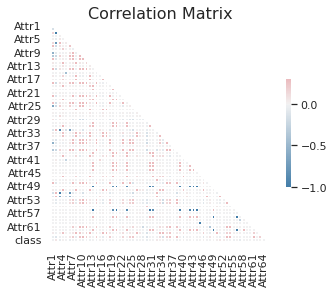

In [ ]:
plot_correlation_matrix(df1.corr())

In [ ]:
corr1 = df1.corr()
s=0
corr_name=[]
for i in range(len(corr1)):
  for j in range(s+1):
      if corr1.iloc[i,j] <= -0.5:
        print(f'row {corr1.index[i]}, column {corr1.columns[j]}')
        corr_name.append(corr1.index[i])
        corr_name.append(corr1.columns[j])
  s+=1
print(corr_name)

row Attr3, column Attr2
row Attr6, column Attr2
row Attr9, column Attr1
row Attr25, column Attr1
row Attr32, column Attr3
row Attr32, column Attr6
row Attr36, column Attr1
row Attr49, column Attr13
row Attr49, column Attr19
row Attr49, column Attr20
row Attr49, column Attr23
row Attr49, column Attr30
row Attr49, column Attr31
row Attr49, column Attr39
row Attr49, column Attr42
row Attr49, column Attr43
row Attr49, column Attr44
row Attr51, column Attr3
row Attr51, column Attr6
row Attr52, column Attr3
row Attr56, column Attr13
row Attr56, column Attr19
row Attr56, column Attr20
row Attr56, column Attr23
row Attr56, column Attr30
row Attr56, column Attr31
row Attr56, column Attr39
row Attr56, column Attr42
row Attr56, column Attr43
row Attr56, column Attr44
row Attr58, column Attr49
row Attr58, column Attr56
row Attr60, column Attr45
row Attr62, column Attr49
row Attr62, column Attr56
['Attr3', 'Attr2', 'Attr6', 'Attr2', 'Attr9', 'Attr1', 'Attr25', 'Attr1', 'Attr32', 'Attr3', 'Attr32', 

In [ ]:
corr_name=pd.Series(corr_name).value_counts()
df1.drop(corr_name.index[:20], axis=1, inplace=True)
print(df1.columns)

Index(['Attr4', 'Attr5', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11',
       'Attr12', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr21',
       'Attr22', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr38', 'Attr40',
       'Attr41', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr50', 'Attr52',
       'Attr53', 'Attr54', 'Attr55', 'Attr57', 'Attr59', 'Attr60', 'Attr61',
       'Attr63', 'Attr64', 'class'],
      dtype='object')


Data set 2

In [ ]:
corr2 = df2.corr()
s=0
corr_name=[]
for i in range(len(corr2)):
  for j in range(s+1):
      if corr2.iloc[i,j] <= -0.5:
        print(f'row {corr2.index[i]}, column {corr2.columns[j]}')
        corr_name.append(corr2.index[i])
        corr_name.append(corr2.columns[j])
  s+=1
print(corr_name)

row Attr3, column Attr2
row Attr6, column Attr2
row Attr10, column Attr2
row Attr25, column Attr2
row Attr38, column Attr2
row Attr39, column Attr30
row Attr42, column Attr30
row Attr43, column Attr39
row Attr43, column Attr42
row Attr44, column Attr39
row Attr44, column Attr42
row Attr49, column Attr30
row Attr49, column Attr43
row Attr49, column Attr44
row Attr51, column Attr3
row Attr51, column Attr6
row Attr51, column Attr10
row Attr51, column Attr25
row Attr51, column Attr38
row Attr56, column Attr20
row Attr58, column Attr56
row Attr62, column Attr39
row Attr62, column Attr42
row Attr62, column Attr49
['Attr3', 'Attr2', 'Attr6', 'Attr2', 'Attr10', 'Attr2', 'Attr25', 'Attr2', 'Attr38', 'Attr2', 'Attr39', 'Attr30', 'Attr42', 'Attr30', 'Attr43', 'Attr39', 'Attr43', 'Attr42', 'Attr44', 'Attr39', 'Attr44', 'Attr42', 'Attr49', 'Attr30', 'Attr49', 'Attr43', 'Attr49', 'Attr44', 'Attr51', 'Attr3', 'Attr51', 'Attr6', 'Attr51', 'Attr10', 'Attr51', 'Attr25', 'Attr51', 'Attr38', 'Attr56', 'At

In [ ]:
corr_name=pd.Series(corr_name).value_counts()
df2.drop(corr_name.index[:15], axis=1, inplace=True)
print(df2.columns)

Index(['Attr1', 'Attr4', 'Attr5', 'Attr7', 'Attr8', 'Attr9', 'Attr11',
       'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18',
       'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr26',
       'Attr27', 'Attr28', 'Attr29', 'Attr31', 'Attr32', 'Attr33', 'Attr34',
       'Attr35', 'Attr36', 'Attr37', 'Attr40', 'Attr41', 'Attr45', 'Attr46',
       'Attr47', 'Attr48', 'Attr50', 'Attr52', 'Attr53', 'Attr54', 'Attr55',
       'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr63', 'Attr64',
       'class'],
      dtype='object')


Data set 3

In [ ]:
corr3 = df3.corr()
s=0
corr_name=[]
for i in range(len(corr3)):
  for j in range(s+1):
      if corr3.iloc[i,j] <= -0.5:
        print(f'row {corr3.index[i]}, column {corr3.columns[j]}')
        corr_name.append(corr3.index[i])
        corr_name.append(corr3.columns[j])
  s+=1
print(corr_name)

row Attr3, column Attr2
row Attr6, column Attr2
row Attr10, column Attr2
row Attr25, column Attr2
row Attr38, column Attr2
row Attr39, column Attr30
row Attr51, column Attr3
row Attr51, column Attr6
row Attr51, column Attr10
row Attr51, column Attr25
row Attr51, column Attr38
row Attr56, column Attr20
row Attr58, column Attr56
row Attr59, column Attr57
['Attr3', 'Attr2', 'Attr6', 'Attr2', 'Attr10', 'Attr2', 'Attr25', 'Attr2', 'Attr38', 'Attr2', 'Attr39', 'Attr30', 'Attr51', 'Attr3', 'Attr51', 'Attr6', 'Attr51', 'Attr10', 'Attr51', 'Attr25', 'Attr51', 'Attr38', 'Attr56', 'Attr20', 'Attr58', 'Attr56', 'Attr59', 'Attr57']


In [ ]:
corr_name=pd.Series(corr_name).value_counts()
print(corr_name)
df3.drop(corr_name.index[:8], axis=1, inplace=True)
print(df3.columns)

Attr2     5
Attr51    5
Attr3     2
Attr6     2
Attr10    2
Attr25    2
Attr38    2
Attr56    2
Attr39    1
Attr30    1
Attr20    1
Attr58    1
Attr59    1
Attr57    1
dtype: int64
Index(['Attr1', 'Attr4', 'Attr5', 'Attr7', 'Attr8', 'Attr9', 'Attr11',
       'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18',
       'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr26',
       'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33',
       'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr39', 'Attr40', 'Attr41',
       'Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48',
       'Attr49', 'Attr50', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')


Data set 4

In [ ]:
corr4 = df4.corr()
s=0
corr_name=[]
for i in range(len(corr4)):
  for j in range(s+1):
      if corr4.iloc[i,j] <= -0.5:
        print(f'row {corr4.index[i]}, column {corr4.columns[j]}')
        corr_name.append(corr4.index[i])
        corr_name.append(corr4.columns[j])
  s+=1
print(corr_name)

row Attr3, column Attr1
row Attr3, column Attr2
row Attr6, column Attr2
row Attr10, column Attr1
row Attr10, column Attr2
row Attr25, column Attr2
row Attr32, column Attr3
row Attr32, column Attr10
row Attr32, column Attr25
row Attr38, column Attr1
row Attr38, column Attr2
row Attr38, column Attr32
row Attr43, column Attr19
row Attr43, column Attr23
row Attr43, column Attr31
row Attr43, column Attr42
row Attr44, column Attr19
row Attr44, column Attr23
row Attr44, column Attr31
row Attr44, column Attr42
row Attr49, column Attr43
row Attr49, column Attr44
row Attr51, column Attr3
row Attr51, column Attr6
row Attr51, column Attr10
row Attr51, column Attr25
row Attr51, column Attr38
row Attr58, column Attr42
row Attr58, column Attr49
row Attr59, column Attr57
row Attr62, column Attr42
row Attr62, column Attr49
['Attr3', 'Attr1', 'Attr3', 'Attr2', 'Attr6', 'Attr2', 'Attr10', 'Attr1', 'Attr10', 'Attr2', 'Attr25', 'Attr2', 'Attr32', 'Attr3', 'Attr32', 'Attr10', 'Attr32', 'Attr25', 'Attr38', '

In [ ]:
corr_name=pd.Series(corr_name).value_counts()
df4.drop(corr_name.index[:18], axis=1, inplace=True)
print(df4.columns)

Index(['Attr4', 'Attr5', 'Attr7', 'Attr8', 'Attr9', 'Attr11', 'Attr12',
       'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr20',
       'Attr21', 'Attr22', 'Attr24', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr39',
       'Attr40', 'Attr41', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr50',
       'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr59',
       'Attr60', 'Attr61', 'Attr63', 'Attr64', 'class'],
      dtype='object')


Data set 5

In [ ]:
corr5 = df5.corr()
s=0
corr_name=[]
for i in range(len(corr5)):
  for j in range(s+1):
      if corr5.iloc[i,j] <= -0.5:
        print(f'row {corr5.index[i]}, column {corr5.columns[j]}')
        corr_name.append(corr5.index[i])
        corr_name.append(corr5.columns[j])
  s+=1
print(corr_name)

row Attr6, column Attr2
row Attr10, column Attr2
row Attr10, column Attr7
row Attr11, column Attr10
row Attr14, column Attr10
row Attr18, column Attr10
row Attr22, column Attr10
row Attr24, column Attr10
row Attr25, column Attr1
row Attr25, column Attr7
row Attr25, column Attr11
row Attr25, column Attr14
row Attr25, column Attr18
row Attr25, column Attr22
row Attr25, column Attr24
row Attr30, column Attr19
row Attr30, column Attr23
row Attr35, column Attr10
row Attr35, column Attr25
row Attr36, column Attr1
row Attr36, column Attr6
row Attr36, column Attr7
row Attr36, column Attr11
row Attr36, column Attr14
row Attr36, column Attr18
row Attr36, column Attr22
row Attr36, column Attr24
row Attr36, column Attr35
row Attr38, column Attr2
row Attr38, column Attr7
row Attr38, column Attr11
row Attr38, column Attr14
row Attr38, column Attr18
row Attr38, column Attr22
row Attr38, column Attr35
row Attr42, column Attr30
row Attr43, column Attr42
row Attr44, column Attr19
row Attr44, column Attr

In [ ]:
corr_name=pd.Series(corr_name).value_counts()
df5.drop(corr_name.index[:23], axis=1, inplace=True)
print(df5.columns)

Index(['Attr3', 'Attr4', 'Attr5', 'Attr8', 'Attr9', 'Attr12', 'Attr13',
       'Attr15', 'Attr16', 'Attr17', 'Attr20', 'Attr21', 'Attr26', 'Attr27',
       'Attr28', 'Attr29', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr37',
       'Attr39', 'Attr40', 'Attr41', 'Attr45', 'Attr46', 'Attr47', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'class'],
      dtype='object')


Missing values

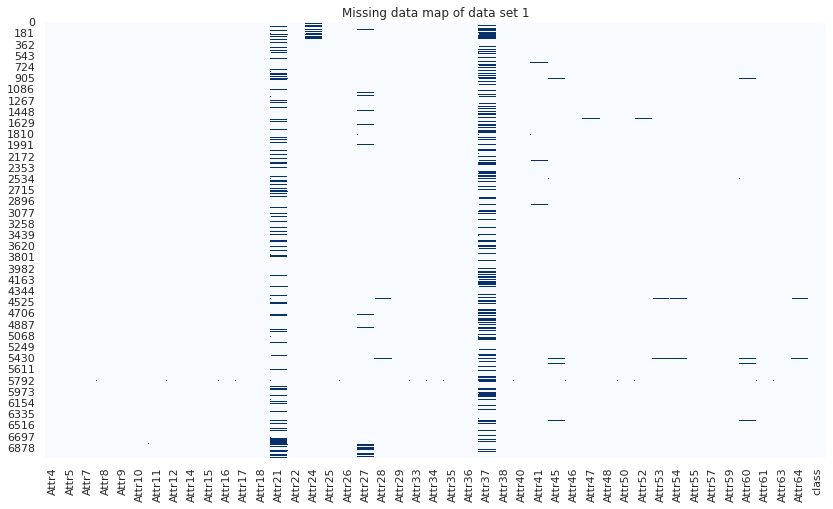

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df1.isna(), cbar=False, cmap="Blues").set_title("Missing data map of data set 1")
plt.show()

Drop columns which contain more than 5% missing values of total.

In [ ]:
null1 = df1.isnull().sum().sort_values(ascending=False) /len(df1)
print(null1[null1>0.05])

null2 = df2.isnull().sum().sort_values(ascending=False) /len(df2)
print(null2[null2>0.05])

null3 = df3.isnull().sum().sort_values(ascending=False) /len(df3)
print(null3[null3>0.05])

null4 = df4.isnull().sum().sort_values(ascending=False) /len(df4)
print(null4[null4>0.05])

null5 = df5.isnull().sum().sort_values(ascending=False) /len(df5)
print(null5[null5>0.05])

Attr37    0.389925
Attr21    0.230824
dtype: float64
Attr37    0.444117
Attr21    0.311019
Attr27    0.069399
Attr60    0.053377
Attr45    0.053180
dtype: float64
Attr37    0.450919
Attr21    0.076835
Attr27    0.068076
Attr60    0.056365
Attr45    0.056270
dtype: float64
Attr37    0.453636
Attr27    0.065462
Attr60    0.062704
Attr45    0.062602
dtype: float64
Attr37    0.431134
Attr27    0.066159
dtype: float64


In [ ]:
df1.drop(['Attr21', 'Attr37', 'Attr27', 'Attr60', 'Attr45'], axis=1, inplace=True)
df2.drop(['Attr21', 'Attr37', 'Attr27', 'Attr60', 'Attr45'], axis=1, inplace=True)
df3.drop(['Attr21', 'Attr37', 'Attr27', 'Attr60', 'Attr45'], axis=1, inplace=True)
df4.drop(['Attr21', 'Attr37', 'Attr27', 'Attr60', 'Attr45'], axis=1, inplace=True)
df5.drop(['Attr21', 'Attr37', 'Attr27', 'Attr60', 'Attr45'], axis=1, inplace=True)

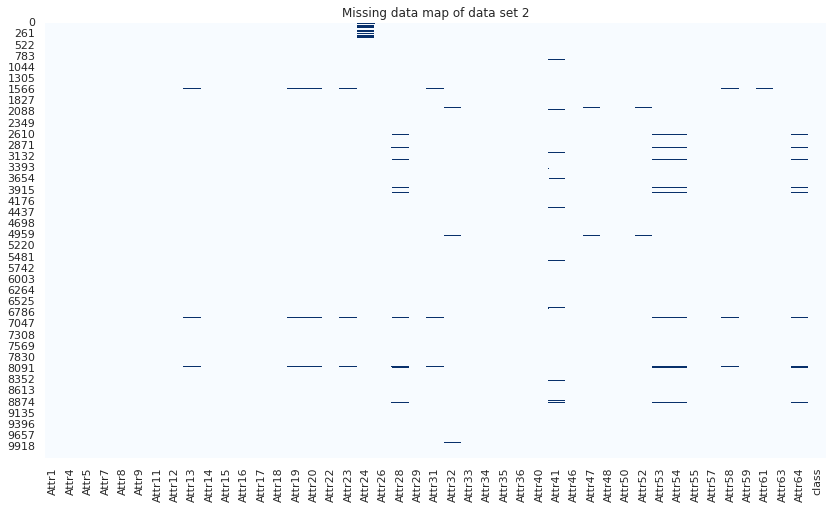

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df2.isna(), cbar=False, cmap="Blues").set_title("Missing data map of data set 2")
plt.show()

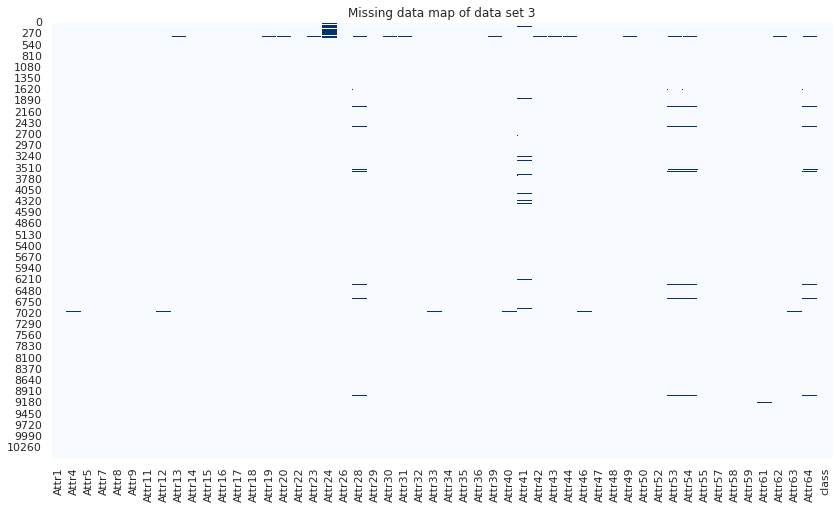

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df3.isna(), cbar=False, cmap="Blues").set_title("Missing data map of data set 3")
plt.show()

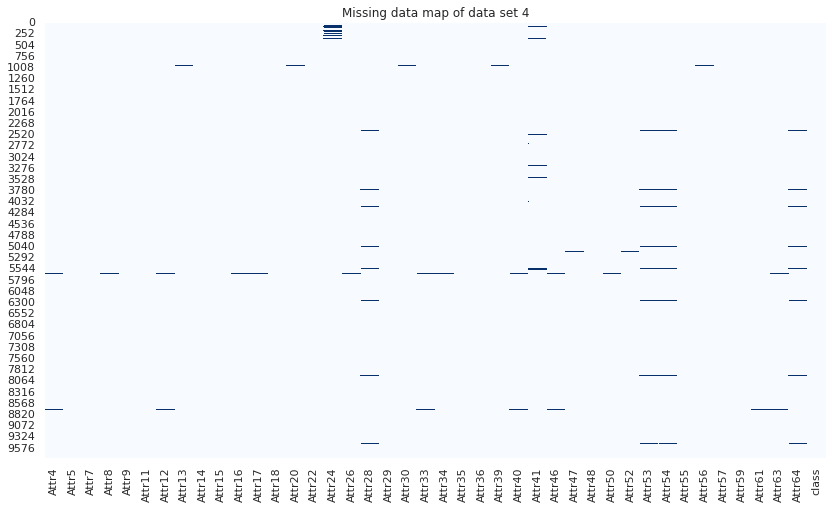

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df4.isna(), cbar=False, cmap="Blues").set_title("Missing data map of data set 4")
plt.show()

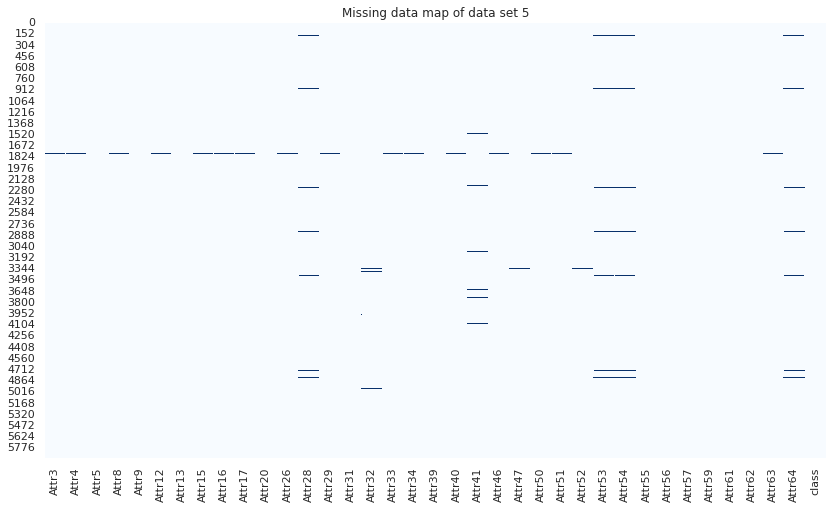

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df5.isna(), cbar=False, cmap="Blues").set_title("Missing data map of data set 5")
plt.show()

Synchronize variables between 5 data sets

In [ ]:
synchronized_col = set(df1.columns).intersection(set(df2.columns))
synchronized_col = synchronized_col.intersection(set(df3.columns))
synchronized_col = synchronized_col.intersection(set(df4.columns))
synchronized_col = synchronized_col.intersection(set(df5.columns))
print(synchronized_col)
print(len(synchronized_col))

{'Attr50', 'Attr54', 'Attr57', 'Attr46', 'Attr28', 'Attr12', 'Attr41', 'Attr63', 'Attr64', 'Attr5', 'Attr55', 'Attr9', 'Attr40', 'class', 'Attr15', 'Attr53', 'Attr61', 'Attr59', 'Attr34', 'Attr16', 'Attr17', 'Attr33', 'Attr26', 'Attr8', 'Attr29', 'Attr47', 'Attr52', 'Attr4'}
28


In [ ]:
final_col = list(synchronized_col)
df1 = df1[final_col]
df2 = df2[final_col]
df3 = df3[final_col]
df4 = df4[final_col]
df5 = df5[final_col]
print(len(df5.columns))

28


In [ ]:
df1.columns

Index(['Attr50', 'Attr54', 'Attr57', 'Attr46', 'Attr28', 'Attr12', 'Attr41',
       'Attr63', 'Attr64', 'Attr5', 'Attr55', 'Attr9', 'Attr40', 'class',
       'Attr15', 'Attr53', 'Attr61', 'Attr59', 'Attr34', 'Attr16', 'Attr17',
       'Attr33', 'Attr26', 'Attr8', 'Attr29', 'Attr47', 'Attr52', 'Attr4'],
      dtype='object')

Fill missing value of observations by mean values

In [ ]:
df1.fillna(df1.mean(), inplace=True)
df2.fillna(df2.mean(), inplace=True)
df3.fillna(df3.mean(), inplace=True)
df4.fillna(df4.mean(), inplace=True)
df5.fillna(df5.mean(), inplace=True)
print(df1.isnull().sum().sum())

0


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Merge 5 subsets into a joint data set

In [ ]:
# Add the column of the amount of year to consider whether observations would be bankrupt or not in each data set
df1['amt_year']=5
df2['amt_year']=4
df3['amt_year']=3
df4['amt_year']=2
df5['amt_year']=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Bring target variable - "class" to the last column
def reindex_col(df):
  class_col = df['class']
  df.drop('class', axis=1, inplace=True)
  df['Bankrupt']=class_col
reindex_col(df1)
reindex_col(df2)
reindex_col(df3)
reindex_col(df4)
reindex_col(df5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(7027, 29)
(10173, 29)
(10503, 29)
(9792, 29)
(5910, 29)


In [ ]:
# Merge
frames = [df1, df2, df3, df4, df5]
data = pd.concat(frames)
data

,Attr50,Attr54,Attr57,Attr46,Attr28,Attr12,Attr41,Attr63,Attr64,Attr5,Attr55,Attr9,Attr40,Attr15,Attr53,Attr61,Attr59,Attr34,Attr16,Attr17,Attr33,Attr26,Attr8,Attr29,Attr47,Attr52,Attr4,amt_year,Bankrupt
0,2.04200,2.24800,0.397180,1.52250,1.761500,0.659800,0.051402,4.4158,7.42770,32.3510,348690.00,1.13890,0.662950,497.42,2.24370,5.1372,0.001924,0.56393,0.733780,2.63490,3.8772,0.604110,1.33050,5.9443,49.394,0.25792,2.04720,5,0
1,1.94470,17.86600,0.420020,1.12520,16.946000,0.516800,0.064371,3.4000,60.98700,14.7860,2304.60,1.69960,0.086422,677.96,17.86600,3.2732,0.000000,2.98760,0.538380,2.00050,2.9876,0.439920,0.99601,3.6884,100.130,0.33472,1.94470,5,0
2,1.07580,2.05040,0.817740,1.01010,1.062700,0.641840,0.074020,2.7185,5.20780,-1.1523,6332.70,1.30900,0.322020,794.16,1.20980,3.9510,0.694840,1.42740,0.459610,1.43690,2.0630,0.372820,0.43695,4.3749,96.372,0.48474,1.55480,5,0
3,2.49280,2.45240,0.142070,1.56960,1.961800,0.301630,0.069622,4.2228,5.54970,51.9520,20545.00,1.05710,0.401390,917.01,2.45240,3.6147,0.000000,0.37581,0.398030,3.25370,3.9948,0.361520,1.86610,4.6511,84.344,0.25033,2.49280,5,0
4,1.29590,2.11840,0.484310,0.95787,1.118400,0.331470,0.096680,2.8692,7.89800,-7.3128,3186.60,1.15590,0.293040,1133.20,1.88390,4.3158,0.124440,0.32340,0.322110,1.63070,2.4823,0.322110,0.63070,4.1424,65.936,0.40285,1.40630,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.37454,0.90248,0.043904,0.62061,0.052831,0.061959,0.356510,7.4313,2.27990,-18.9070,3599.10,1.67680,0.022858,6507.60,0.39944,12.4320,1.259400,2.36440,0.056089,1.41600,7.4000,0.054556,0.41600,4.9667,27.207,0.13514,1.17220,1,1
5906,0.16455,-0.45546,1.482000,0.12517,-0.952400,-0.602160,-0.073529,4.4940,5.13050,-67.3650,-9242.10,0.93979,0.024771,-742.28,-0.46385,44.7590,-0.018084,-0.55316,-0.491730,1.03410,4.7819,-0.491730,-0.40334,4.0622,3.098,0.20912,0.16576,1,1
5907,0.64421,-0.81508,0.548240,0.56733,-1.442300,-0.142840,0.214140,1.7559,9.95270,-120.4400,-58253.00,1.17490,0.064095,-3298.20,-1.70670,3.4892,-0.522430,0.14077,-0.110670,0.79665,1.4945,-0.129880,-0.26018,5.3244,43.526,0.66913,0.74554,1,1
5908,0.25733,0.81772,-1.167700,0.77157,0.019106,-0.620380,-0.589300,4.3911,0.95575,-17.0030,1107.50,0.84516,0.048976,-5352.10,0.11530,6.0769,6.092400,-0.13435,-0.068197,1.34420,5.1956,-0.067762,0.12531,4.8555,22.215,0.19247,1.08780,1,1


Descriptive statistics

In [ ]:
# Interpret features names

feature_name = {'Attr26':'(net profit+De)/total lia', 'Attr8':'book value of E/total lia', 'Attr59':'L-T Lia/E', 'Attr46':'(CA-Inv)/(S-T lia)', 'Attr47':'(Inv*365)/COGS', 'Attr33':'operating expenses/S-T lia', 
                'Attr29':'log of TA', 'Attr54':'constant capital/FA', 'Attr64':'sales/FA', 'Attr17':'TA/total lia', 'Attr55':'working capital', 'Attr50':'CA/total lia', 'Attr4':'CA/S-T lia', 'Attr52':'(S-T lia*365)/COGS)', 
                'Attr9':'sales/TA', 'Attr57':'[CA-Inv-(S-T lia)]/(sales-gross profit-De)', 'Attr40':'(CA-Inv-receivables)/S-T lia', 'Attr61':'sales/receivables', 'Attr53':'E/FA', 'Attr15':'(total lia*365)/(gross profit+De)',
                'Attr34':'operating expenses/total lia', 'Attr63':'sales/S-T lia', 'Attr28':'working capital/FA', 'Attr5':'[(cash+(S-T securities)+receivables-(S-T lia))/(operating expenses-De)]*365', 
                'Attr12':'gross profit/S-T lia', 'Attr16':'(gross profit + De)/total lia', 'Attr41':'total lia/((profit on operating activities+De)*(12/365))', 'amt_year':'Amount of years until bankrupt'}


In [ ]:
data.describe()

,Attr50,Attr54,Attr57,Attr46,Attr28,Attr12,Attr41,Attr63,Attr64,Attr5,Attr55,Attr9,Attr40,Attr15,Attr53,Attr61,Attr59,Attr34,Attr16,Attr17,Attr33,Attr26,Attr8,Attr29,Attr47,Attr52,Attr4,amt_year,Bankrupt
count,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,4.340500e+04,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000
mean,5.833728,24.446313,-0.010524,5.427826,6.010807,1.131700,7.730193,9.342301,72.400499,-3.854251e+02,7.672151e+03,2.652171,2.147407,1.991752e+03,23.564057,17.035141,1.333259,5.410847,1.410798,13.797974,8.635377,1.263533,12.636264,4.005040,3.580529e+02,6.483872,6.313692,3.060247,0.048174
std,307.049679,1209.413556,13.672969,294.896553,152.026505,67.485893,1386.635187,123.985534,2347.078573,6.118021e+04,7.005229e+04,62.926209,55.943341,9.639193e+04,1202.394101,552.399247,122.094600,120.844055,68.444978,506.772567,118.807377,66.151619,505.346292,0.826783,3.303275e+04,637.664940,294.978066,1.283975,0.214137
min,-0.045239,-3828.900000,-1667.300000,-101.260000,-3829.900000,-6331.800000,-1234.400000,-1.543200,-10677.000000,-1.190300e+07,-1.805200e+06,-3.496000,-101.270000,-9.632400e+06,-3828.900000,-12.656000,-327.970000,-1696.000000,-6331.800000,-0.412920,-19.197000,-6331.800000,-141.410000,-0.886060,-9.611000e+01,-25.467000,-0.403110,1.000000,0.000000
25%,0.775870,0.963610,0.014638,0.608610,0.044774,0.015294,0.027543,3.100200,2.207800,-4.929400e+01,2.757300e+01,1.018500,0.052877,2.231800e+02,0.697750,4.515600,0.000000,0.307820,0.073787,1.452400,2.824800,0.067034,0.431070,3.495300,1.637300e+01,0.127380,1.050800,2.000000,0.000000
50%,1.224700,1.398000,0.119650,1.030000,0.486640,0.173830,0.088181,5.102900,4.389200,-1.069200e+00,1.088400e+03,1.195500,0.178130,8.463900e+02,1.228600,6.649500,0.006389,1.975100,0.246780,2.119000,4.641700,0.222550,1.074100,4.014200,3.848200e+01,0.215770,1.574000,3.000000,0.000000
75%,2.217900,2.477700,0.284570,1.919400,1.618100,0.590500,0.217020,8.634200,10.461000,5.063100e+01,4.993700e+03,2.062700,0.662320,2.229000e+03,2.333300,10.443000,0.236280,4.567400,0.668120,3.717800,7.839900,0.601440,2.632700,4.520100,7.124600e+01,0.354540,2.800200,4.000000,0.000000
max,53433.000000,180440.000000,552.640000,53433.000000,21701.000000,8259.400000,288770.000000,23454.000000,294770.000000,1.250100e+06,6.123700e+06,9742.300000,8007.100000,1.023600e+07,180440.000000,108000.000000,23853.000000,21944.000000,8259.400000,53433.000000,21944.000000,8262.300000,53432.000000,9.698300,6.084200e+06,88433.000000,53433.000000,5.000000,1.000000


Visualization

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

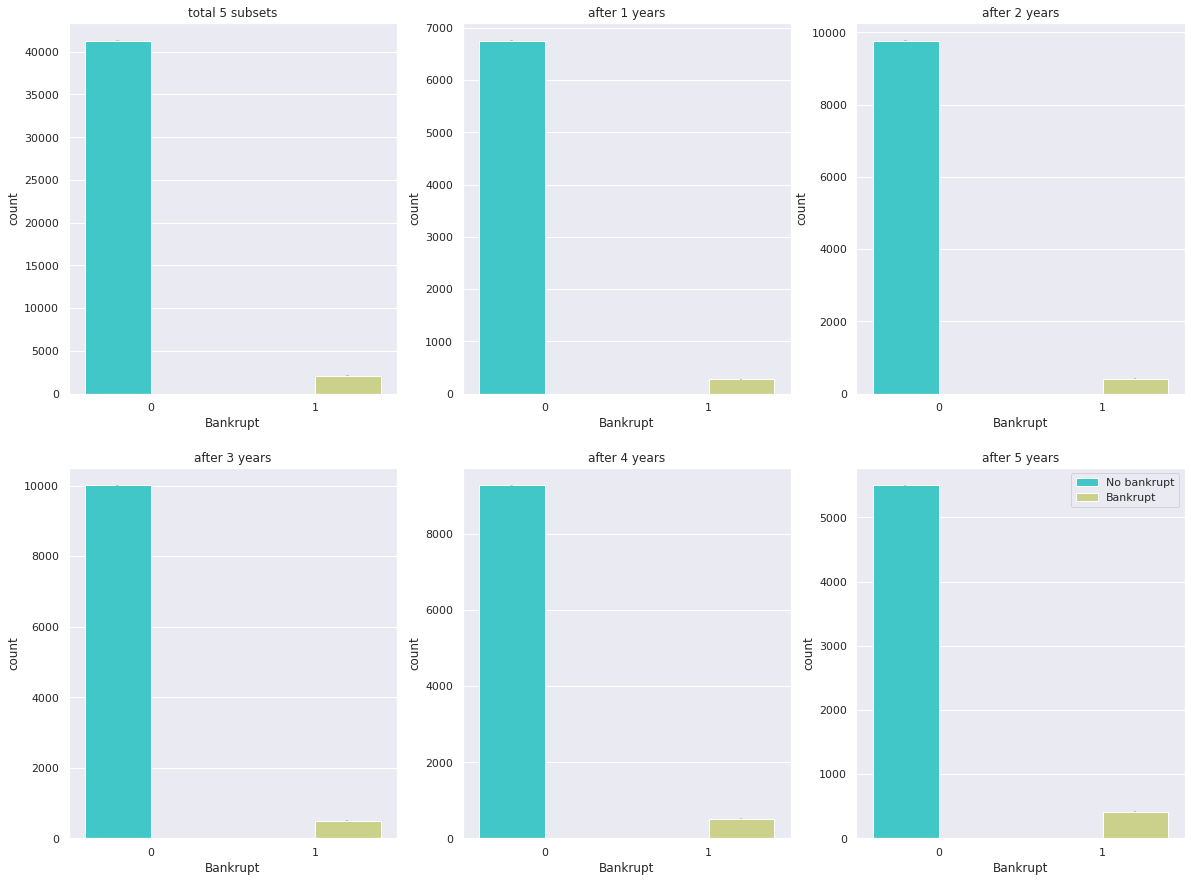

In [ ]:
plt.figure(figsize=(20,15))

x=1
for i in [data, df1, df2, df3, df4, df5]:
  plt.subplot(2,3,x)
  ax = sns.countplot(x=i['Bankrupt'], data=i, palette='rainbow',hue='Bankrupt')
  for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.5,rect.get_height(),horizontalalignment='center', fontsize = 1)
  plt.legend([],[], frameon=False)
  if x in [2, 3, 4, 5, 6]:
    plt.title(f'after {x-1} years')
  else:
    plt.title(f'total 5 subsets')
  x+=1
plt.legend(['No bankrupt', 'Bankrupt'])

**Build model**

In [ ]:
data['Bankrupt'].value_counts()

0    41314
1     2091
Name: Bankrupt, dtype: int64

In [ ]:
from copy import deepcopy
data_1 = deepcopy(data) 

Split train-test set

In [ ]:
X = data_1.drop('Bankrupt', axis=1).values
y = data_1['Bankrupt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

Run model

Import libraries

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

Check which algorithm is optimal for this prediction.

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    'Support Vector Machine (RBF Kernel)': SVC(),
    'Neural Network': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
  model.fit(X_train, y_train)
  result = model.score(X_test, y_test)
  print(name + ': {:.2f}%'.format(result * 100))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression: 94.92%
K-Nearest Neighbors: 94.70%
Decision Tree: 92.51%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Support Vector Machine (Linear Kernel): 94.90%
Support Vector Machine (RBF Kernel): 94.90%
Neural Network: 94.85%
Random Forest: 95.05%


--> The most optimal model is Random Forest

optimal n_estimators value is 90 that accuracy is 0.9529432290578044


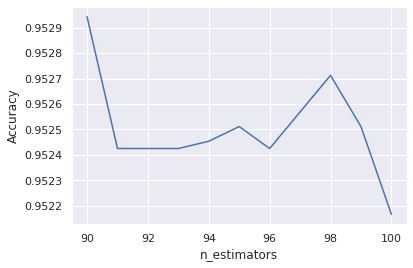

In [ ]:
n_estimators = list(range(90, 101))   # 100 trường hợp từ 1 đến 100 Decision Trees để tạo 100 Random Forest Metrics.
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier(random_state=0)
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X_train, y_train)
scores = gs.cv_results_['mean_test_score']

ind = np.where(scores == np.amax(scores))[0][0]+90

print(f'optimal n_estimators value is {ind} that accuracy is {scores.max()}')

plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.savefig('accuracy_with_optiml_n_estimators.png')

In [ ]:
rf = RandomForestClassifier(n_estimators=ind, random_state=0)

In [ ]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.savefig('roc_chart.png')
    return (f, ax)

def compute_roc_auc(index):
    y_predict = rf.predict_proba(X[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

,AUC Train,AUC Test
0,1.000000,0.829081
1,0.999999,0.834573
2,0.999999,0.822458
3,1.000000,0.826115
4,1.000000,0.842706


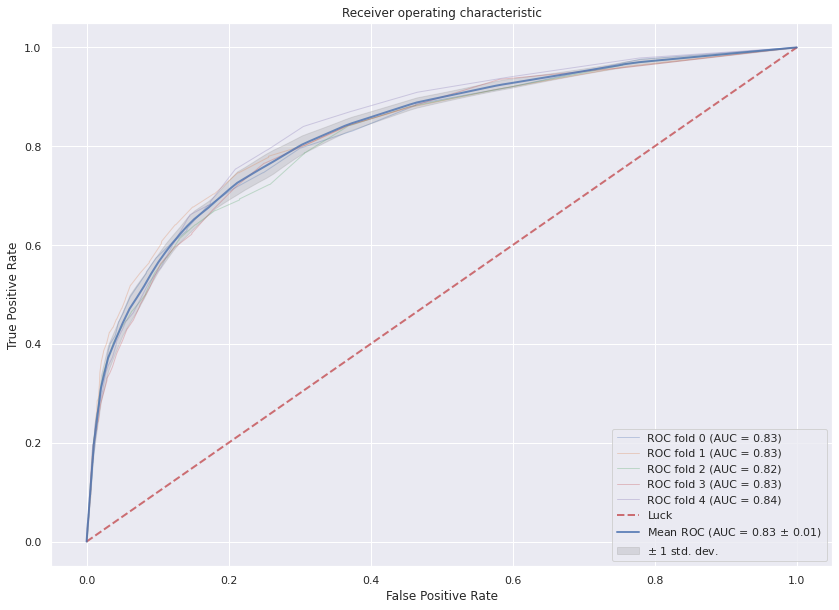

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    rf.fit(X[train], y[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

Feature importance

In [ ]:
ft_imp = pd.Series(rf.feature_importances_, index=feature_name.values()).sort_values(ascending=False)
print(ft_imp)   

(CA-Inv)/(S-T lia)                                                             0.067259
[CA-Inv-(S-T lia)]/(sales-gross profit-De)                                     0.052172
CA/S-T lia                                                                     0.044673
TA/total lia                                                                   0.044261
gross profit/S-T lia                                                           0.042983
sales/receivables                                                              0.040003
log of TA                                                                      0.038412
E/FA                                                                           0.037506
sales/S-T lia                                                                  0.037121
working capital                                                                0.036130
[(cash+(S-T securities)+receivables-(S-T lia))/(operating expenses-De)]*365    0.035642
(S-T lia*365)/COGS)             

In [ ]:
df = ft_imp.to_frame()
df = df.rename(columns = {0:'(%)'})

df_styled = df.style.background_gradient()
df_styled

,(%)
(CA-Inv)/(S-T lia),0.067259
[CA-Inv-(S-T lia)]/(sales-gross profit-De),0.052172
CA/S-T lia,0.044673
TA/total lia,0.044261
gross profit/S-T lia,0.042983
sales/receivables,0.040003
log of TA,0.038412
E/FA,0.037506
sales/S-T lia,0.037121
working capital,0.036130


Confusion matrix

In [ ]:
y_pred = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


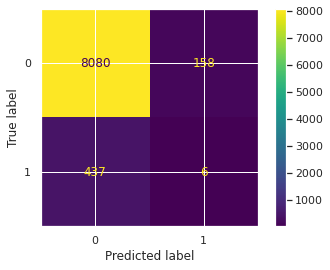

In [ ]:
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

Classification report

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8238
           1       0.04      0.01      0.02       443

    accuracy                           0.93      8681
   macro avg       0.49      0.50      0.49      8681
weighted avg       0.90      0.93      0.92      8681



--> Imbalanced data set

**Resampling data set**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Oversampling

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_train_over).value_counts()

1    33076
0    33076
dtype: int64

In [ ]:
print('Predict on over-sampling trainning set')
rf_over = RandomForestClassifier(random_state=0)
rf_over.fit(X_train_over, y_train_over)

y_pred_train_over = rf_over.predict(X_train_over)
print(classification_report(y_train_over,y_pred_train_over))
print('Random Forest accuracy: ', accuracy_score(y_train_over, y_pred_train_over))

Predict on over-sampling trainning set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33076
           1       1.00      1.00      1.00     33076

    accuracy                           1.00     66152
   macro avg       1.00      1.00      1.00     66152
weighted avg       1.00      1.00      1.00     66152

Random Forest accuracy:  0.9998941830934817


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


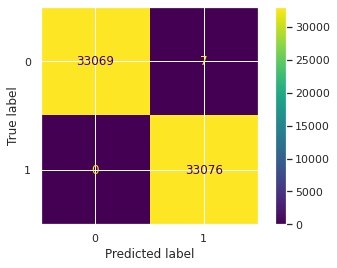

In [ ]:
plot_confusion_matrix(rf_over, X_train_over, y_train_over)  
plt.show()

In [ ]:
print('Predict on over sampling testing set')
y_pred_over = rf_over.predict(X_test)
print(classification_report(y_test,y_pred_over))
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred_over))

Predict on over sampling testing set
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8238
           1       0.59      0.15      0.24       443

    accuracy                           0.95      8681
   macro avg       0.77      0.57      0.61      8681
weighted avg       0.94      0.95      0.94      8681

Random Forest accuracy:  0.9512728948277848


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


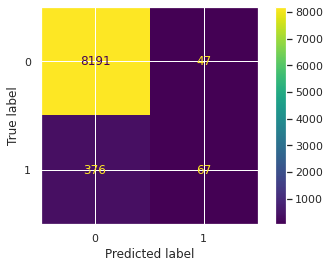

In [ ]:
plot_confusion_matrix(rf_over, X_test, y_test)  
plt.show()

Undersampling

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_train_under).value_counts()

0    1648
1    1648
dtype: int64

In [ ]:
print('Predict on under-sampling trainning set')
rf_under = RandomForestClassifier(random_state=0)
rf_under.fit(X_train_under, y_train_under)

y_pred_train_under = rf_under.predict(X_train_under)
print(classification_report(y_train_under,y_pred_train_under))
print('Random Forest accuracy: ', accuracy_score(y_train_under, y_pred_train_under))

Predict on under-sampling trainning set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1648
           1       1.00      1.00      1.00      1648

    accuracy                           1.00      3296
   macro avg       1.00      1.00      1.00      3296
weighted avg       1.00      1.00      1.00      3296

Random Forest accuracy:  0.9996966019417476


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


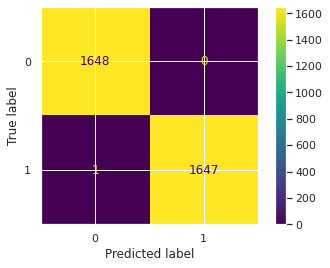

In [ ]:
plot_confusion_matrix(rf_under, X_train_under, y_train_under)  
plt.show()

In [ ]:
print('Predict on under-sampling testing set')
y_pred_under = rf_under.predict(X_test)
print(classification_report(y_test,y_pred_under))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred_under))

Predict on under-sampling testing set
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      8238
           1       0.14      0.75      0.23       443

    accuracy                           0.75      8681
   macro avg       0.56      0.75      0.54      8681
weighted avg       0.94      0.75      0.82      8681

Logistic Regression accuracy:  0.7454210344430365


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


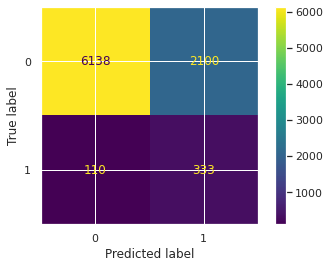

In [ ]:
plot_confusion_matrix(rf_under, X_test, y_test)  
plt.show()

In [ ]:
# Feature importance

In [ ]:
ft_imp_under = pd.Series(rf_under.feature_importances_, index=feature_name.values()).sort_values(ascending=False)
print(ft_imp_under)   

(CA-Inv)/(S-T lia)                                                             0.068516
sales/S-T lia                                                                  0.060366
E/FA                                                                           0.055640
log of TA                                                                      0.055536
operating expenses/S-T lia                                                     0.044552
TA/total lia                                                                   0.040912
(total lia*365)/(gross profit+De)                                              0.040689
(S-T lia*365)/COGS)                                                            0.039215
[CA-Inv-(S-T lia)]/(sales-gross profit-De)                                     0.038456
[(cash+(S-T securities)+receivables-(S-T lia))/(operating expenses-De)]*365    0.037296
gross profit/S-T lia                                                           0.036472
CA/S-T lia                      

In [ ]:
df_uder = ft_imp_under.to_frame()
df_uder = df_uder.rename(columns = {0:'(%)'})

df_styled_under = df_uder.style.background_gradient()
df_styled_under

,(%)
(CA-Inv)/(S-T lia),0.068516
sales/S-T lia,0.060366
E/FA,0.055640
log of TA,0.055536
operating expenses/S-T lia,0.044552
TA/total lia,0.040912
(total lia*365)/(gross profit+De),0.040689
(S-T lia*365)/COGS),0.039215
[CA-Inv-(S-T lia)]/(sales-gross profit-De),0.038456
[(cash+(S-T securities)+receivables-(S-T lia))/(operating expenses-De)]*365,0.037296


Rank the number of years until bankruptcy most correctly predicted, by all true predictions and only true bankruptcy predictions

In [ ]:
X_test.columns = data_1.drop('Bankrupt', axis=1).columns
actual_obs = pd.Series(y_test).rename('Actual Obs')
prediction = pd.Series(y_pred_under).rename('Prediction')
final_dt=pd.concat([X_test['amt_year'],actual_obs,prediction],axis=1)
final_dt["amt_year"].replace({final_dt.iloc[0,0]: "until 1 year", final_dt.iloc[1,0]: "until 2 year", final_dt.iloc[8678,0]: "until 3 year", final_dt.iloc[4,0]: "until 4 year", final_dt.iloc[3,0]: "until 5 year"}, inplace=True)
final_dt

,amt_year,Actual Obs,Prediction
0,until 1 year,0,0
1,until 2 year,0,0
2,until 4 year,0,0
3,until 5 year,0,1
4,until 4 year,0,0
...,...,...,...
8676,until 1 year,0,1
8677,until 3 year,0,0
8678,until 3 year,0,0
8679,until 4 year,0,0


In [ ]:
# For all correct predictions
true_pred = list()
for i in range(len(final_dt)):
  if final_dt.iloc[i,1] == final_dt.iloc[i,2]:
    true_pred.append(final_dt.iloc[i,0])
print(true_pred)
rank1 = pd.Series(true_pred).value_counts()

['until 1 year', 'until 2 year', 'until 4 year', 'until 4 year', 'until 4 year', 'until 2 year', 'until 2 year', 'until 4 year', 'until 4 year', 'until 4 year', 'until 2 year', 'until 2 year', 'until 4 year', 'until 1 year', 'until 5 year', 'until 1 year', 'until 3 year', 'until 3 year', 'until 1 year', 'until 2 year', 'until 2 year', 'until 3 year', 'until 2 year', 'until 4 year', 'until 2 year', 'until 4 year', 'until 3 year', 'until 3 year', 'until 4 year', 'until 2 year', 'until 4 year', 'until 4 year', 'until 1 year', 'until 3 year', 'until 3 year', 'until 1 year', 'until 3 year', 'until 3 year', 'until 1 year', 'until 5 year', 'until 2 year', 'until 4 year', 'until 5 year', 'until 1 year', 'until 3 year', 'until 2 year', 'until 4 year', 'until 2 year', 'until 5 year', 'until 5 year', 'until 5 year', 'until 4 year', 'until 4 year', 'until 2 year', 'until 2 year', 'until 2 year', 'until 3 year', 'until 3 year', 'until 2 year', 'until 2 year', 'until 4 year', 'until 4 year', 'until 

In [ ]:
# For correct bankruptcy predictions
true_bankruptcy = list()
for i in range(len(final_dt)):
  if final_dt.iloc[i,1] == final_dt.iloc[i,2] and final_dt.iloc[i,1] == 1:
    true_bankruptcy.append(final_dt.iloc[i,0])
print(true_bankruptcy)
rank2 = pd.Series(true_bankruptcy).value_counts()

['until 1 year', 'until 4 year', 'until 1 year', 'until 1 year', 'until 2 year', 'until 3 year', 'until 1 year', 'until 5 year', 'until 3 year', 'until 5 year', 'until 4 year', 'until 2 year', 'until 3 year', 'until 4 year', 'until 1 year', 'until 1 year', 'until 3 year', 'until 1 year', 'until 3 year', 'until 1 year', 'until 2 year', 'until 2 year', 'until 1 year', 'until 2 year', 'until 1 year', 'until 3 year', 'until 2 year', 'until 3 year', 'until 4 year', 'until 5 year', 'until 2 year', 'until 2 year', 'until 2 year', 'until 1 year', 'until 5 year', 'until 3 year', 'until 4 year', 'until 3 year', 'until 4 year', 'until 5 year', 'until 3 year', 'until 5 year', 'until 3 year', 'until 2 year', 'until 4 year', 'until 4 year', 'until 3 year', 'until 2 year', 'until 2 year', 'until 4 year', 'until 2 year', 'until 3 year', 'until 5 year', 'until 5 year', 'until 1 year', 'until 1 year', 'until 2 year', 'until 3 year', 'until 3 year', 'until 3 year', 'until 4 year', 'until 1 year', 'until 

In [ ]:
rank1 = rank1.to_frame()
rank1 = rank1.rename(columns = {0:'All true predictions'})

rank1 = rank1.style.background_gradient()
rank1

,All true predictions
until 4 year,1549
until 3 year,1477
until 2 year,1414
until 5 year,1140
until 1 year,891


In [ ]:
rank2 = rank2.to_frame()
rank2 = rank2.rename(columns = {0:'True bankruptcy predictions'})

rank2 = rank2.style.background_gradient()
rank2

,True bankruptcy predictions
until 2 year,80
until 3 year,77
until 1 year,66
until 4 year,66
until 5 year,44


Set up threshold 40%

In [ ]:
threshold = 0.4

predicted_proba = rf_under.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75      8238
           1       0.10      0.86      0.18       443

    accuracy                           0.61      8681
   macro avg       0.55      0.73      0.47      8681
weighted avg       0.94      0.61      0.72      8681



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
